# Minimal Binary Classification with PyCaret on cancer dataset

**Dataset:** Breast Cancer Wisconsin (Diagnostic) — predict whether tumor is `malignant` or `benign`.

**Why this dataset?**
- Ships with scikit-learn → no downloads required
- Balanced binary target, clean numeric features

**Notebook Outline**
1. Load dataset from scikit-learn
2. Create DataFrame and readable target labels
3. Run PyCaret setup + compare_models
4. Plot ROC & confusion matrix
5. Predict on holdout set

## 1) Load data

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
labels = {0: 'malignant', 1: 'benign'}

df = X.copy()
df['target'] = y.map(labels)

print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## 2) Quick sanity checks

In [2]:
print(df['target'].value_counts())
print('Total missing values:', df.isna().sum().sum())

target
benign       357
malignant    212
Name: count, dtype: int64
Total missing values: 0


## 3) PyCaret setup & model comparison

In [4]:
from pycaret.classification import *

s = setup(
    data=df,
    target='target',
    session_id=42,
    fold=5,
    normalize=False,
    log_experiment=False,
    use_gpu=True
)

best = compare_models()
print(best)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Target mapping,"benign: 0, malignant: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9622,0.9856,0.9622,0.9639,0.9616,0.9167,0.9196,0.0300
lightgbm,Light Gradient Boosting Machine,0.9622,0.9838,0.9622,0.9633,0.9617,0.9173,0.9192,2.6480
qda,Quadratic Discriminant Analysis,0.9598,0.9876,0.9598,0.9611,0.9599,0.9145,0.9157,0.0360
xgboost,Extreme Gradient Boosting,0.9572,0.9857,0.9572,0.9576,0.9569,0.9070,0.9080,0.1220
gbc,Gradient Boosting Classifier,0.9546,0.9831,0.9546,0.9550,0.9545,0.9021,0.9027,0.4800
ada,Ada Boost Classifier,0.9522,0.9765,0.9522,0.9541,0.9520,0.8968,0.8992,0.1640
rf,Random Forest Classifier,0.9521,0.9861,0.9521,0.9524,0.9520,0.8969,0.8973,0.2300
et,Extra Trees Classifier,0.9521,0.9887,0.9521,0.9524,0.9518,0.8959,0.8968,0.2100
lda,Linear Discriminant Analysis,0.9497,0.9902,0.9497,0.9526,0.9488,0.8892,0.8937,0.0340
lr,Logistic Regression,0.9396,0.9902,0.9396,0.9399,0.9393,0.8693,0.8702,0.3140


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=42, solver='auto',
                tol=0.0001)


## 4) Evaluate & predict on holdout

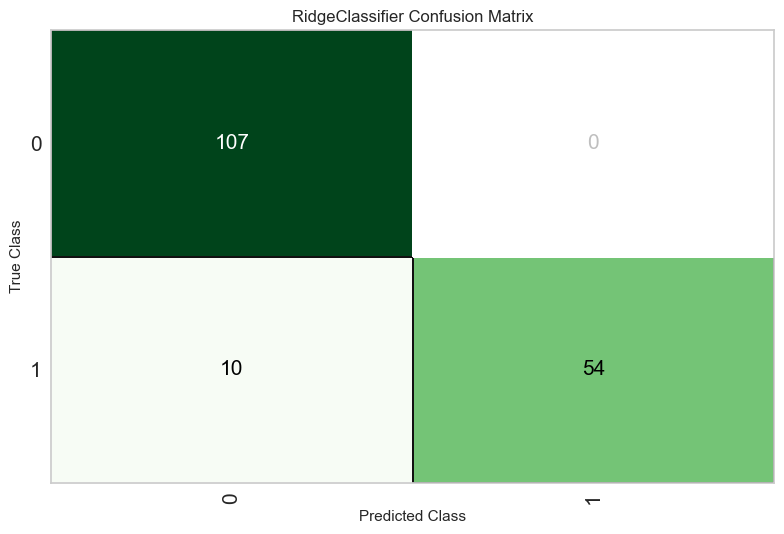

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9415,0,0.9415,0.9465,0.9403,0.8711,0.8784


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,prediction_label
448,14.53,19.340000,94.250000,659.700012,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,...,108.099998,830.500000,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463,benign,benign
346,12.06,18.900000,76.660004,445.299988,0.08386,0.05794,0.00751,0.008488,0.1555,0.06048,...,86.540001,562.599976,0.12890,0.13520,0.04506,0.05093,0.2880,0.08083,benign,benign
568,7.76,24.540001,47.919998,181.000000,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,...,59.160000,268.600006,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,benign,benign
411,11.04,16.830000,70.919998,373.200012,0.10770,0.07804,0.03046,0.024800,0.1714,0.06340,...,79.930000,471.399994,0.13690,0.14820,0.10670,0.07431,0.2998,0.07881,benign,benign
519,12.75,16.700001,82.510002,493.799988,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,...,93.629997,624.099976,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,benign,benign


In [6]:
plot_model(best, plot='confusion_matrix')

pred_holdout = predict_model(best)
pred_holdout.head()